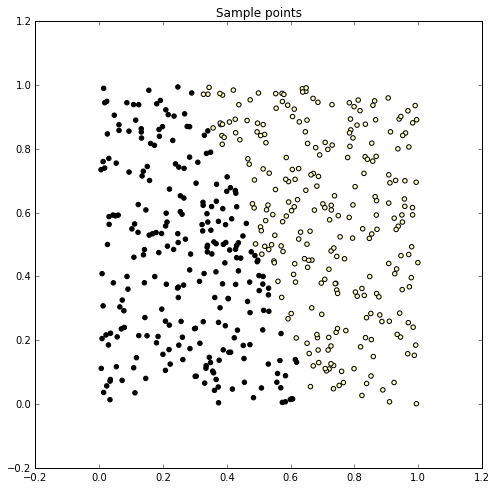

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt

import keras

import tensorflow as tf

import numpy as np

# generate some sample data
X = np.random.random((500, 2))


W = np.random.random((2, 1))
b = np.random.random()
a = 1 / (1 + np.exp(-(X.dot(W) + b))) 

y = np.zeros((500, 1))
y[a > np.mean(a)] = 1

rgb = plt.get_cmap('jet')(y)

plt.figure(figsize=(8, 8))
plt.title("Sample points")
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.get_cmap("magma"))

Done!
(0.52000000000000002, 1.0)
Loss: 80.0000
Loss: 39.8786
Loss: 46.6816
Loss: 40.9044
Loss: 46.8024
Loss: 40.1385
Loss: 109.7654
Loss: 1177.9973
Loss: 40.4242
Loss: 39.6122
Done!


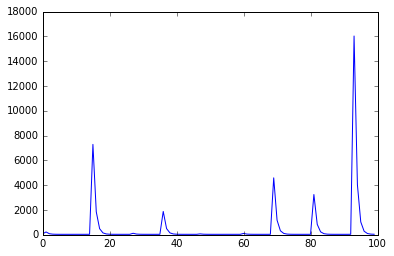

In [40]:
X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]

from keras.layers import Dense, Activation
from keras.objectives import binary_crossentropy

# this placeholder will contain our input digits, as flat vectors
data = tf.placeholder(tf.float32, shape=(None, 2))
labels = tf.placeholder(tf.float32, shape=(None, 1))

# the w vector
w = tf.Variable(tf.zeros([2, 1]), name='w')
C = tf.constant(0.2)

# fully-connected layer with 128 units and ReLU activation
x = Dense(2, activation='relu', use_bias = True)(data)
preds = Dense(1, activation='sigmoid', use_bias = True)(x)  

loss = tf.reduce_mean(binary_crossentropy(labels, preds))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# get interactive session
sess = tf.InteractiveSession()

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
with sess.as_default():
    for i in range(100):
        train_step.run(feed_dict={
            data: X_train,
            labels: y_train
        })
    print("Done!")

from keras.metrics import categorical_accuracy as accuracy

acc = accuracy(labels, preds)
with sess.as_default():
    y_hat, acc_value = sess.run([preds, acc], feed_dict={
        data: X_test, 
        labels: y_test
    })
    
    naive_acc = np.mean(np.array(y_hat > 0.5, dtype=float) == y_test)
print(naive_acc, np.mean(acc_value))
    

# Hinge loss

# this placeholder will contain our input digits, as flat vectors
data = tf.placeholder(tf.float32, shape=(None, 2))
labels = tf.placeholder(tf.float32, shape=(None, 1))

# the w vector
w = tf.Variable(tf.zeros([2, 1]), name='w')
C = tf.constant(0.2)

# fully-connected layer with 128 units and ReLU activation
theta = Dense(2, activation='relu', use_bias = True)(data)

hinge_loss = 0.5*tf.matmul(tf.transpose(w), w) + \
             C * tf.reduce_sum(tf.pow(tf.maximum(0.0, 1 - tf.matmul(theta, w)*labels), 2))
    
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(hinge_loss)

# get interactive session
sess = tf.InteractiveSession()

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
losses = []
with sess.as_default():
    for i in range(100):
        loss_val, _ , w_val = sess.run([hinge_loss, train_step, w], feed_dict={
            data: X_train,
            labels: y_train
        })
        losses.append(loss_val[0][0])
        if i % 10 == 0:
            print("Loss: %0.4f" % loss_val)
    print("Done!")

plt.plot(losses)

In [114]:
w_1, _ = w_val
xs = np.linspace(0.1, 0.85)

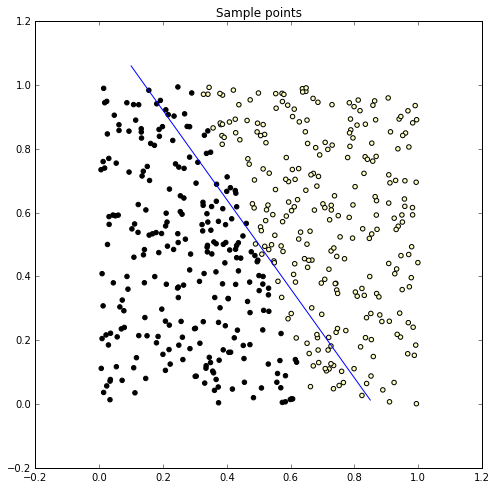

In [115]:
plt.figure(figsize=(8, 8))
plt.title("Sample points")
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.get_cmap("magma"))
plt.plot(xs, -w_1*xs + 1.2)